## Import Libraries & Load Dataset

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

## Surface Crack Dataset

In [2]:
image_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    validation_split = 0.2
)

In [ ]:
path = "../input/surface-crack-detection"
Train = image_generator.flow_from_directory(
    path,
    class_mode = "categorical",
    batch_size = 64,
    target_size = (150,150),
    subset = "training"
)
Val = image_generator.flow_from_directory(
    path,
    class_mode = "categorical",
    batch_size = 64,
    target_size = (150,150),
    subset = "validation"
)

# Model

In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2,activation="softmax"))

2022-03-19 18:22:39.394643: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               10616960  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

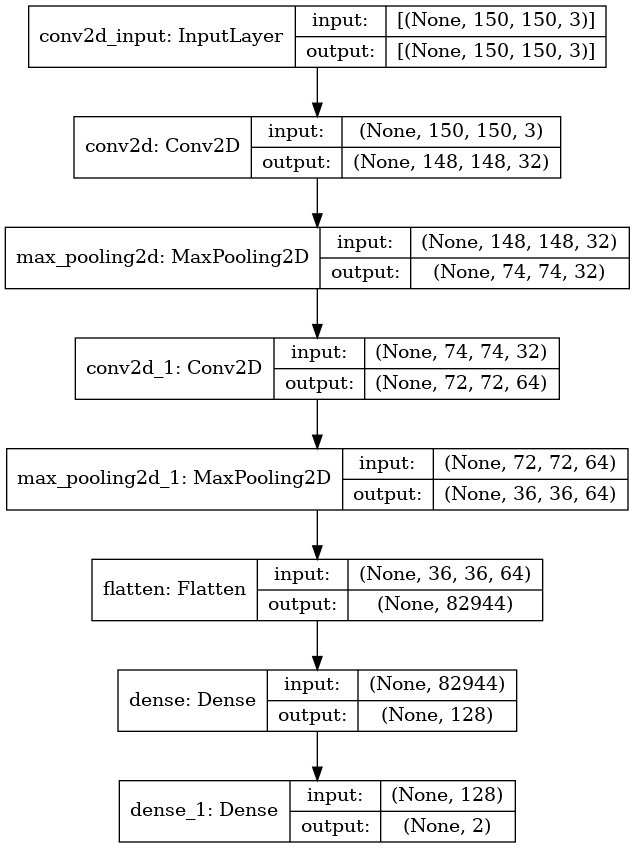

In [6]:
plot_model(model,show_shapes=True)

In [7]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("Surface_Crack.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [8]:
history = model.fit(Train,
                    epochs = 10,
                    validation_data =Val,
                    callbacks = [checkpoint])

2022-03-19 18:23:00.663974: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
500/500 [==============================] - 465s 927ms/step - loss: 0.1589 - accuracy: 0.9551 - val_loss: 0.0633 - val_accuracy: 0.9844
Epoch 2/10
500/500 [==============================] - 408s 815ms/step - loss: 0.0472 - accuracy: 0.9863 - val_loss: 0.0223 - val_accuracy: 0.9954
Epoch 3/10
500/500 [==============================] - 409s 817ms/step - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.0269 - val_accuracy: 0.9935
Epoch 4/10
500/500 [==============================] - 406s 811ms/step - loss: 0.0240 - accuracy: 0.9933 - val_loss: 0.0134 - val_accuracy: 0.9960
Epoch 5/10
500/500 [==============================] - 408s 817ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.0363 - val_accuracy: 0.9914
Epoch 6/10
500/500 [==============================] - 421s 842ms/step - loss: 0.0131 - accuracy: 0.9961 - val_loss: 0.0151 - val_accuracy: 0.9945
Epoch 7/10
500/500 [==============================] - 416s 831ms/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0423 -

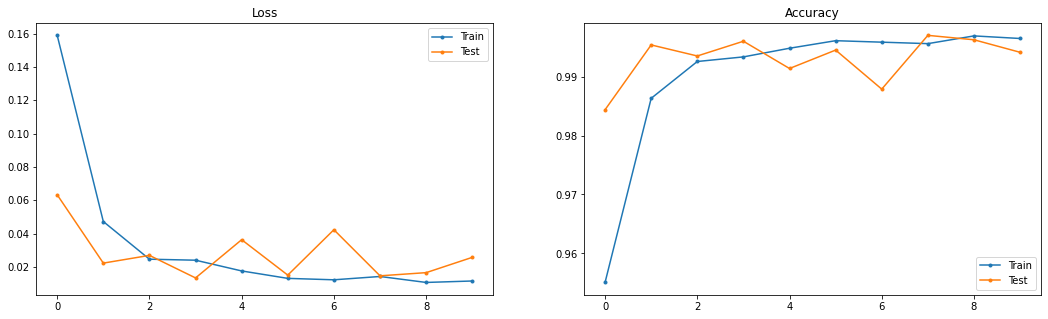

In [11]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()